<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/Model_evaluation_and_find_optimal_hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House price prediction

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from matplotlib.pyplot import plot
pd.set_option('display.max_columns', None) # This option displays all the columns


In [39]:
# Load dataset
kc_house_data = pd.read_csv('https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/kc_house_data.csv')

In [40]:
# Get an idea on number of rows and columns
print(kc_house_data.shape)

# Print the column names
print(kc_house_data.columns)

# Print the column types
print(kc_house_data.dtypes)

# Additional Details
kc_house_data.info()

# Summary
all_cols_summary = kc_house_data.describe()
print(round(all_cols_summary, 2))

(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  


In [41]:
# Defining X data
X = kc_house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = kc_house_data['price']

In [42]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17290, 18)
(17290,)
(4323, 18)
(4323,)


In [43]:
import sklearn
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X_train, y_train)

# Coefficients and Intercept
print(model_1.intercept_)
print(model_1.coef_)

8080822.666115353
[-3.76187142e+04  4.39929752e+04  1.11927627e+02  1.12260521e-01
  7.86848634e+03  5.82851207e+05  5.24147307e+04  2.56475517e+04
  9.63780999e+04  7.02315648e+01  4.16960621e+01 -2.66443082e+03
  2.22630357e+01 -5.83768676e+02  6.04058556e+05 -2.04643130e+05
  1.84979337e+01 -3.70481687e-01]


In [44]:
# Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train = model_1.predict(X_train)
print(metrics.r2_score(y_train, y_pred_train))

0.7004310823997759


In [45]:
# Rsquared Calculation on test data
y_pred_test = model_1.predict(X_test)
print(metrics.r2_score(y_test, y_pred_test))

0.6964362880041246


In [46]:
# RSquared
print("R-Squared on Train data: ", metrics.r2_score(y_train, y_pred_train))
print("R-Squared on Test data: ", metrics.r2_score(y_test, y_pred_test))

R-Squared on Train data:  0.7004310823997759
R-Squared on Test data:  0.6964362880041246


In [47]:
# MAD
print("MAD on Train data: ", round(np.mean(np.abs(y_train - y_pred_train)), 2))
print("MAD on Test data: ", round(np.mean(np.abs(y_test - y_pred_test)), 2))

MAD on Train data:  125920.32
MAD on Test data:  126818.8


In [48]:
# MAPE
print("MAPE on Train data: ", round(np.mean(np.abs(y_train - y_pred_train) / y_train), 2))
print("MAPE on Test data: ", round(np.mean(np.abs(y_test - y_pred_test) / y_test), 2))

MAPE on Train data:  0.26
MAPE on Test data:  0.26


In [49]:
# RMSE
print("RMSE on Train data: ", round(math.sqrt(np.mean(np.abs(y_train - y_pred_train) ** 2)), 2))
print("RMSE on Test data: ", round(math.sqrt(np.mean(np.abs(y_test - y_pred_test) ** 2)), 2))

RMSE on Train data:  202295.52
RMSE on Test data:  196693.42


In [50]:
# Describe method price
round(kc_house_data.price.describe())

,price
count,21613.0
mean,540088.0
std,367127.0
min,75000.0
25%,321950.0
50%,450000.0
75%,645000.0
max,7700000.0


## Credit Risk Data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from matplotlib.pyplot import plot
pd.set_option('display.max_columns', None)

In [52]:
# Load the dataset
credit_risk_data = pd.read_csv('https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/credit_risk_data_v1.csv')

# Get an idea on number of rows and columns
print(credit_risk_data.shape)

# Print the column names
print(credit_risk_data.columns)

# Print the column types
print(credit_risk_data.dtypes)

# Additional Details
credit_risk_data.info()

# Summary and Bad will be dependent factor
all_cols_summary = credit_risk_data.describe()
print(round(all_cols_summary, 2))

(150008, 10)
Index(['Cust_num', 'Bad', 'Credit_Limit', 'Late_Payments_Count',
       'Card_Utilization_Percent', 'Age', 'Debt_to_income_ratio',
       'Monthly_Income', 'Num_loans_personal_loans', 'Family_dependents'],
      dtype='object')
Cust_num                      int64
Bad                           int64
Credit_Limit                  int64
Late_Payments_Count           int64
Card_Utilization_Percent    float64
Age                           int64
Debt_to_income_ratio        float64
Monthly_Income                int64
Num_loans_personal_loans      int64
Family_dependents             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cust_num                  150008 non-null  int64  
 1   Bad                       150008 non-null  int64  
 2   Credit_Limit              150008 non-null  in

### Defining X and y data

In [53]:
# Defining X data
X = credit_risk_data[['Credit_Limit', 'Late_Payments_Count',
       'Card_Utilization_Percent', 'Age', 'Debt_to_income_ratio',
       'Monthly_Income', 'Num_loans_personal_loans', 'Family_dependents']]

y = credit_risk_data['Bad'] #0 give, 1 = dont give(bad)

### Splitting the Dataset

In [54]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120006, 8)
(120006,)
(30002, 8)
(30002,)


### Building the Logistic Regression Model

In [55]:
# from sklearn.preprocessing import StandardScaler  # Import StandardScaler
# from sklearn.linear_model import LogisticRegression  # Import LogisticRegression

# # Option 1: Increase max_iter (be cautious of overfitting)
# # model_2 = LogisticRegression(solver="lbfgs", max_iter=500)  # Increase iterations (optional)

# # Option 2: Scale the data (recommended)
# #scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# model_2 = LogisticRegression(solver="lbfgs")
# model_2.fit(X_train_scaled, y_train)

# # Coefficients and Intercept
# print(model_2.intercept_)
# print(model_2.coef_)

In [56]:
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(solver="lbfgs", max_iter=2000)
model_2.fit(X_train, y_train)

# Coefficients and Intercept
print(model_2.intercept_)
print(model_2.coef_)

[-2.8074694]
[[-3.48983518e-05  6.16175476e-01  1.85209124e-02 -1.97438020e-02
   3.77589100e-01  4.46771064e-06  5.18987426e-02  7.40712326e-02]]


### Confusion Matrix Calculation on Train Data

[[111369    545]
 [  7531    561]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9279303862335906, 0.9918241088894966),
  ('0', '1'): (0.0,
   0.9951463680257092,
   0.9279303862335906,
   0.0048536319742907025),
  ('1', '0'): (0.9329055106117001,
   0.0,
   0.06709448938830004,
   0.927580334459365),
  ('1', '1'): (0.9329055106117001,
   0.9309025935955777,
   0.06709448938830004,
   0.0690974064044222)})

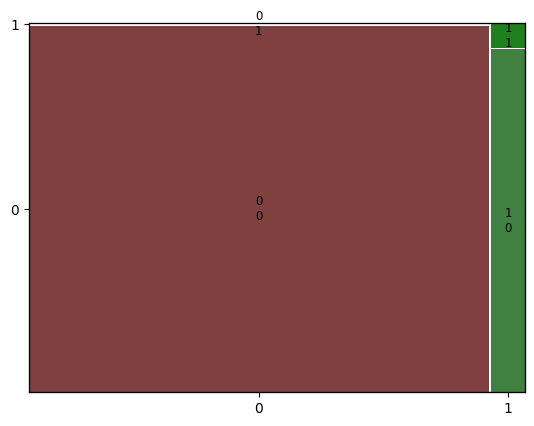

In [57]:
# Install the statsmodels library
!pip install statsmodels

# Confusion Matrix Calculation on Train Data
from sklearn.metrics import confusion_matrix

y_pred_train = model_2.predict(X_train)
cm1 = confusion_matrix(y_train, y_pred_train)
print(cm1)

# Import mosaic from the correct module
from statsmodels.graphics.mosaicplot import mosaic
mosaic(cm1)

### Accuracy on Train Data

In [58]:
# Accuracy on Train Data
accuracy1 = (cm1[0, 0] + cm1[1, 1]) / (cm1[0, 0] + cm1[0, 1] + cm1[1, 0] + cm1[1, 1])
print(accuracy1)

0.9327033648317584


### Confusion Matrix on Test Data

[[27945   122]
 [ 1826   109]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9308500494660225, 0.9923454401410388),
  ('0', '1'): (0.0,
   0.9956676992772514,
   0.9308500494660225,
   0.004332300722748537),
  ('1', '0'): (0.9358251738441319,
   0.0,
   0.0641748261558682,
   0.9405341368564731),
  ('1', '1'): (0.9358251738441319,
   0.9438563959926858,
   0.0641748261558682,
   0.05614360400731412)})

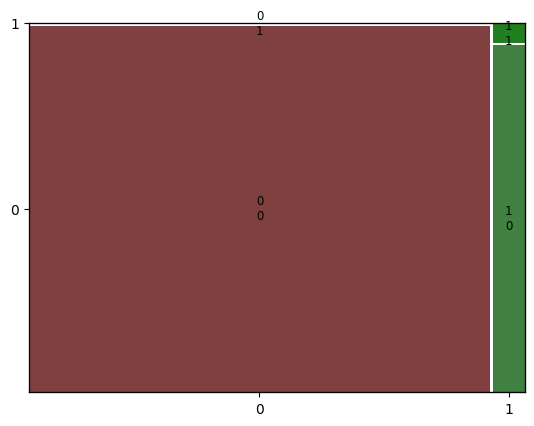

In [59]:
# Confusion Matrix on Test Data
y_pred_test = model_2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred_test)
print(cm2)

# Import mosaic from the correct module
from statsmodels.graphics.mosaicplot import mosaic
mosaic(cm2)

### Accuracy on Test Data

In [60]:
# Accuracy on Test Data
accuracy2 = (cm2[0, 0] + cm2[1, 1]) / (cm2[0, 0] + cm2[0, 1] + cm2[1, 0] + cm2[1, 1])
print(accuracy2)

0.9350709952669822


In [61]:
#Frequency of target variable
credit_risk_data['Bad'].value_counts()

,count
Bad,
0,139981
1,10027


### Sensitivity  and Specificity Calculations

# accuracy
accuracy = (TN+TP)/(TN+TP+FN+FP)
means the propartion of customers where the model correctly predict whether or not they churned.


# sensitivity(TP)
sensitivity = TP/(TP+FN)
means the propartion of customers who churned(y=1) where the model correctly predicted that they churned (true positive)

# specificity(True negative)
specificity = TN/(TN+FP)
means the propartion of customers who didnt churned(y=0) where the model correctly predicted that they didnt churned (true negative)

In [62]:
# Sensitivity and Specificity Calculations
# Sensitivity on Train Data
Sensitivity1 = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
print(round(Sensitivity1, 3))

# Specificity on Train Data
Specificity1 = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
print(round(Specificity1, 3))

# Sensitivity on Test Data
Sensitivity2 = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])
print(round(Sensitivity2, 3))

# Specificity on Test Data
Specificity2 = cm2[1, 1] / (cm2[1, 0] + cm2[1, 1])
print(round(Specificity2, 3))

0.995
0.069
0.996
0.056


### Probability predictions

In [63]:
y_pred_prob=model_2.predict_proba(X_train)
print(y_pred_prob.shape)
print(y_pred_prob)
print(y_pred_prob[0,])
print(y_pred_prob[0,0])
print(y_pred_prob[0,1])
print(y_pred_prob[0:5,1])
print(y_pred_prob[:,1])

(120006, 2)
[[0.96576371 0.03423629]
 [0.96317964 0.03682036]
 [0.78879951 0.21120049]
 ...
 [0.96293016 0.03706984]
 [0.82718326 0.17281674]
 [0.98500506 0.01499494]]
[0.96576371 0.03423629]
0.9657637141346676
0.03423628586533246
[0.03423629 0.03682036 0.21120049 0.0217956  0.04389173]
[0.03423629 0.03682036 0.21120049 ... 0.03706984 0.17281674 0.01499494]


In [64]:
y_pred_prob_1=y_pred_prob[:,1]

In [65]:
## Default Threshold 0.5
threshold=0.5
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1
print(y_pred_class)


[0. 0. 0. ... 0. 0. 0.]


In [66]:
##Confusion Matrix and accuracy
cm3 = confusion_matrix(y_train,y_pred_class)
print("confusion Matrix with Threshold ",  threshold,  "\n",cm3)
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print("Accuracy is ", round(accuracy3,3))

confusion Matrix with Threshold  0.5 
 [[111369    545]
 [  7531    561]]
Accuracy is  0.933


In [67]:
##Sensitivity and Specificity on Train data
Sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print("Sensitivity is", round(Sensitivity3,3))

Specificity3=cm3[1,1]/(cm3[1,0]+cm3[1,1])
print("Specificity is ", round(Specificity3,3))

Sensitivity is 0.995
Specificity is  0.069


In [68]:
## New Threshold 0.1
threshold=0.1
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1

In [69]:
##Confusion Matrix and accuracy
cm3 = confusion_matrix(y_train,y_pred_class)
print("confusion Matrix with Threshold ",  threshold,  "\n",cm3)
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print("Accuracy is ", round(accuracy3,3))


confusion Matrix with Threshold  0.1 
 [[94094 17820]
 [ 3305  4787]]
Accuracy is  0.824


In [70]:
##Sensitivity and Specificity on Train data
Sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print("Sensitivity is", round(Sensitivity3,3))

Specificity3=cm3[1,1]/(cm3[1,0]+cm3[1,1])
print("Specificity is ", round(Specificity3,3))

Sensitivity is 0.841
Specificity is  0.592


## ROC Curve Creation

In [71]:
## New Threshold 0.1
threshold=0.01
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1

##Confusion Matrix and accuracy
cm3 = confusion_matrix(y_train,y_pred_class)
print("confusion Matrix with Threshold ",  threshold,  "\n",cm3)
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print("Accuracy is ", round(accuracy3,3))

##Sensitivity and Specificity on Train data
Sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print("Sensitivity is", round(Sensitivity3,3))

Specificity3=cm3[1,1]/(cm3[1,0]+cm3[1,1])
print("Specificity is ", round(Specificity3,3))

confusion Matrix with Threshold  0.01 
 [[  1313 110601]
 [    17   8075]]
Accuracy is  0.078
Sensitivity is 0.012
Specificity is  0.998


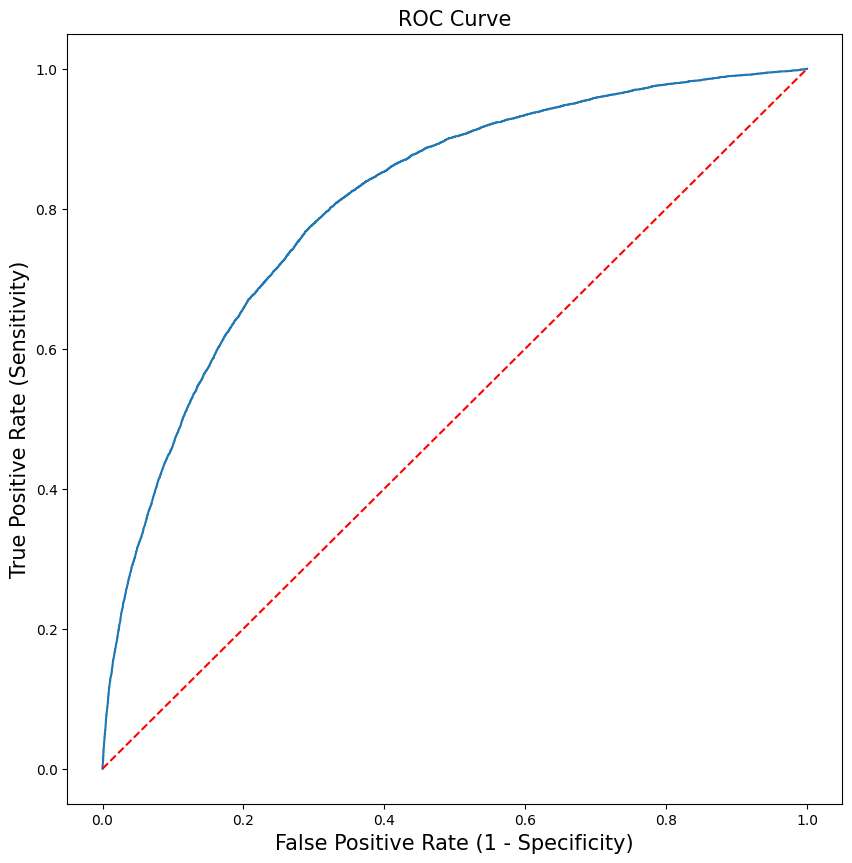

In [72]:
# ROC Curve Creation
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_prob_1)
plt.figure(figsize=(10, 10))
plt.title('ROC Curve', fontsize=15)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
plt.show()

### Area Under Curve (AUC) Value

In [73]:
# Area under Curve (AUC)
auc_value = auc(false_positive_rate, true_positive_rate)
print(auc_value)

0.8098741858851419


In [74]:
##F1 Score
from sklearn.metrics import f1_score

## Threshold 0.5
threshold=0.5
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1
print("threshold=0.5 f1_score ",f1_score(y_train, y_pred_class))

threshold=0.5 f1_score  0.12198303979125896


In [75]:
## Threshold 0.2
threshold=0.2
y_pred_class=y_pred_prob_1*0
y_pred_class[y_pred_prob_1>threshold]=1
print("threshold=0.2 f1_score ",f1_score(y_train, y_pred_class))

threshold=0.2 f1_score  0.3038844963905122


## Cross-Validation

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from matplotlib.pyplot import plot
pd.set_option('display.max_columns', None)

In [79]:
### Test Data Cross-Validation

diabetes_data = pd.read_csv('https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/diabetes.csv')

# Get an idea on number of rows and columns
print(diabetes_data.shape)

# Print the column names
print(diabetes_data.columns)

# Print the column types
print(diabetes_data.dtypes)

# Additional Details
diabetes_data.info()

# Summary
all_cols_summary = diabetes_data.describe()
print(round(all_cols_summary, 2))

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5 

### Defining X and y Data for Diabetes

In [80]:
# Defining X and y data
X = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes_data[['Outcome']]

### Splitting Diabetes Dataset

In [81]:
# Train and Test data creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614, 1)
(154, 8)
(154, 1)


### Building the Decision Tree Model for Diabetes Data

In [90]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
diabetes_tree1 = DecisionTreeClassifier()
diabetes_tree1.fit(X_train, y_train)

# Calculate Accuracy on Train and Test data
print("Max Depth = None")
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Test data Accuracy", diabetes_tree1.score(X_test, y_test))

Max Depth = None
Train data Accuracy 1.0
Test data Accuracy 0.670995670995671


### Decision Tree Model with Pruning Parameters

In [91]:
# Model Building with Pruning Parameters
for depth in [1, 5, 3, 2]:
    print(f"Max Depth = {depth}")
    diabetes_tree1 = DecisionTreeClassifier(max_depth=depth)
    diabetes_tree1.fit(X_train, y_train)
    # Calculate Accuracy on Train and Test data
    print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
    print("Test data Accuracy", diabetes_tree1.score(X_test, y_test))

Max Depth = 1
Train data Accuracy 0.7411545623836127
Test data Accuracy 0.7229437229437229
Max Depth = 5
Train data Accuracy 0.8528864059590316
Test data Accuracy 0.7229437229437229
Max Depth = 3
Train data Accuracy 0.7746741154562383
Test data Accuracy 0.7532467532467533
Max Depth = 2
Train data Accuracy 0.74487895716946
Test data Accuracy 0.7532467532467533


### K-Fold Cross-Validation

In [94]:
# K-Fold Cross-Validation because above n=model with maxdept 3  has best model
diabetes_tree_KF = DecisionTreeClassifier(max_depth=3)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

# Checking the accuracy of model on 10-folds
acc10 = model_selection.cross_val_score(diabetes_tree_KF, X, y, cv=kfold)
print(acc10)
print(acc10.mean())

[0.67532468 0.77922078 0.7012987  0.64935065 0.77922078 0.81818182
 0.83116883 0.83116883 0.67105263 0.71052632]
0.7446514012303486


### Train – Validation – Holdout Cross-Validation

In [86]:
# Train – Validation – Holdout Cross-Validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=99)

# Split Test data into Validation and Holdout data split
X_val, X_hold, y_val, y_hold = model_selection.train_test_split(X_test, y_test, test_size=0.5, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_hold.shape)
print(y_hold.shape)

(537, 8)
(537, 1)
(115, 8)
(115, 1)
(116, 8)
(116, 1)


**Cross-validation** and **hold-out validation** are two techniques for assessing the performance of machine learning models. While both serve the same purpose—validating a model's performance on unseen data—there are key differences between them, and they are suited to different scenarios.

### **1. Hold-out Validation**

In **hold-out validation**, the dataset is split into two (or sometimes three) parts:
   - **Training Set**: Used to train the model.
   - **Test Set**: Used to evaluate the model's performance.
   - (Optional: **Validation Set**: In some cases, a third set is used to tune hyperparameters, especially in deep learning.)

#### **How it Works**:
- A common split is 80% for training and 20% for testing (or 70/30).
- You train the model on the training set and evaluate its performance on the test set.
  
#### **When to Use Hold-out Validation**:
- **Large Datasets**: When you have a lot of data, splitting it into training and test sets is often sufficient because the model will have enough examples to learn and generalize.
- **Quick Model Evaluation**: It is faster because you only split the data once, train the model, and evaluate it.
- **Early Stage Development**: When you’re in the early stages of model development and just want a rough idea of performance.

#### **Disadvantages**:
- **High Variance**: The results can depend heavily on how the data is split. If the split is not representative of the overall dataset, the test accuracy may not generalize well to unseen data.
- **Not suitable for small datasets**: With small datasets, hold-out validation can be problematic because the model may not have enough data to learn effectively, or the test set may not represent the true distribution of data.

---

### **2. Cross-validation**

In **cross-validation**, the dataset is split into multiple smaller subsets or "folds". The model is trained and evaluated multiple times by rotating through the folds.
   - **K-Fold Cross-Validation** is the most common method, where the data is split into **K** equal parts (folds). The model is trained on **K-1** folds and tested on the remaining fold. This process is repeated **K** times, and the final performance is averaged over all runs.

#### **How it Works**:
- For example, in **5-Fold Cross-Validation**, the data is split into 5 parts:
  1. Train on folds 1-4, test on fold 5.
  2. Train on folds 1-3 and 5, test on fold 4.
  3. Repeat for all folds.
  
- The results are averaged to provide a more stable estimate of the model's performance.

#### **When to Use Cross-validation**:
- **Small to Medium Datasets**: When you have limited data, cross-validation makes the most of it by training and testing on multiple subsets, giving you a better estimate of model performance.
- **Model Selection and Tuning**: Cross-validation is very useful when selecting the best model or tuning hyperparameters because it gives you a more reliable performance estimate than hold-out validation.
- **Avoid Overfitting**: Cross-validation helps avoid overfitting since the model is tested on different portions of the data each time, reducing the chance of the model just learning the quirks of a particular test set.

#### **Disadvantages**:
- **Computational Cost**: Cross-validation is more computationally expensive because the model is trained multiple times (once for each fold).
- **Time-Consuming**: If the model takes a long time to train, cross-validation can be very slow.

---

### **Key Differences**:

| Feature                      | Hold-out Validation                       | Cross-validation                    |
|------------------------------|-------------------------------------------|-------------------------------------|
| **Data Split**                | Single split (e.g., 80% train, 20% test)  | Multiple splits (e.g., 5 or 10 folds) |
| **Training**                  | Model trained once                       | Model trained multiple times (K times) |
| **Evaluation Stability**      | Results can vary depending on the split   | More reliable, stable performance estimates |
| **Computational Cost**        | Faster, less computation required         | More computationally expensive, slower |
| **Suitability for Small Data**| Not ideal (may lead to biased results)    | Well-suited, maximizes use of available data |
| **Risk of Overfitting**       | Higher risk of overfitting to the test set| Lower risk due to multiple test sets |
| **Use Case**                  | Large datasets, quick evaluation         | Small/medium datasets, model tuning, or more rigorous evaluation |

---

### **When to Use Which**:
- **Use Hold-out Validation** when:
  - You have a large dataset.
  - You need a quick evaluation of a model’s performance.
  - You’re in the early stages of development and don’t need fine-tuned models yet.

- **Use Cross-validation** when:
  - You have a small to medium-sized dataset, and it’s important to make the most of the available data.
  - You’re comparing multiple models or tuning hyperparameters.
  - You need a reliable estimate of model performance across different data splits.
  - You want to minimize overfitting and maximize generalizability.

In summary, cross-validation gives you more stable and reliable results, especially for smaller datasets, while hold-out validation is quicker but riskier in terms of variance and overfitting.


### Model Building with Pruning Parameters and Holdout Cross-Validation

In [95]:
# Model Building with Pruning Parameters and Accuracy Evaluation
for depth in [6, 1, 3]:
    print(f"Max Depth = {depth}")
    diabetes_tree1 = DecisionTreeClassifier(max_depth=depth)
    diabetes_tree1.fit(X_train, y_train)
    # Calculate Accuracy on Train, Validation data
    print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
    print("Validation data Accuracy", diabetes_tree1.score(X_val, y_val))

Max Depth = 6
Train data Accuracy 0.8975791433891993
Validation data Accuracy 0.6956521739130435
Max Depth = 1
Train data Accuracy 0.7411545623836127
Validation data Accuracy 0.6869565217391305
Max Depth = 3
Train data Accuracy 0.7746741154562383
Validation data Accuracy 0.7304347826086957


### Final Model and Result on Holdout Data

In [96]:
# Final Model Result
print("Max Depth 3")
print("Train data Accuracy", diabetes_tree1.score(X_train, y_train))
print("Validation data Accuracy", diabetes_tree1.score(X_val, y_val))
print("Holdout data Accuracy", diabetes_tree1.score(X_hold, y_hold))

Max Depth 3
Train data Accuracy 0.7746741154562383
Validation data Accuracy 0.7304347826086957
Holdout data Accuracy 0.7758620689655172


### Grid Search for Best Parameters

In [97]:
# Grid Search
from sklearn.model_selection import GridSearchCV
grid_param = {'max_depth': range(1, 10, 1), 'max_leaf_nodes': range(2, 30, 1)}
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, grid_param)
clf.fit(X_train, y_train)

# Examine the best model
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

grid_result_tree = clf.best_estimator_
print("Train data Accuracy", grid_result_tree.score(X_train, y_train))
print("Validation data Accuracy", grid_result_tree.score(X_val, y_val))

0.75969193492558
{'max_depth': 5, 'max_leaf_nodes': 8}
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
Train data Accuracy 0.8026070763500931
Validation data Accuracy 0.7217391304347827



Grid Search is a technique used to find the optimal hyperparameters for a machine learning model. It's a brute-force method where you define a set of possible values (a "grid") for each hyperparameter, and the algorithm evaluates every possible combination of these hyperparameters to find the best one according to a predefined performance metric (such as accuracy, precision, or AUC).
ow Grid Search Works:
Hyperparameter Grid: You define the hyperparameters to tune and the values to try for each one. For example, for a Random Forest, you might tune:

n_estimators (number of trees),
max_depth (maximum depth of each tree),
min_samples_split (minimum samples required to split a node).
Model Training and Evaluation: Grid Search systematically tries each combination of hyperparameters, trains the model on the training data, and evaluates it using cross-validation or on a validation set. This is repeated for each combination.

Optimal Combination: After trying all combinations, the one that results in the best performance on the validation data is selected as the optimal set of hyperparameters.


In summary, Grid Search is a comprehensive and thorough method for hyperparameter tuning but can be computationally expensive. When tuning large models or when facing constraints on computational resources, Randomized Search can be a more efficient alternative.